# Trabajo Práctico Final de Aprendizaje de Maquina II

##Integrantes:
- Lucas Musciano
- Hernán Matías Silva


## Introducción:

En Bolivia, la valoración de autos usados presenta un desafío considerable debido a la falta de datos estructurados y confiables. Actualmente, los vendedores y compradores de vehículos dependen en gran medida de plataformas como Facebook Marketplace para estimar el valor de un automóvil. Alternativamente, recurren a comparar su vehículo con otros autos en venta del mismo modelo, lo que introduce un alto grado de subjetividad e inexactitud en el proceso.

Esta problemática resalta la necesidad de un enfoque más sistemático y preciso para determinar el valor de los autos usados. La motivación detrás de este trabajo radica en la posibilidad de proporcionar una herramienta que no solo facilite una valoración más precisa, sino que también permita una mejor comprensión del mercado automotriz boliviano. Al desarrollar un modelo de machine learning que pueda predecir los precios de los vehículos con mayor exactitud, no solo se optimiza la toma de decisiones para vendedores y compradores, sino que también se abre una ventana para analizar tendencias y comportamientos en el mercado de autos usados en Bolivia.



##Fuente de datos:

Para el presente trabajo se utilizó el dataset del portal Autopia dedicado a la compra venta de autos usados en el mercado boliviano.

https://www.autopia.com.bo


### Incorporación de datos sintéticos:
Un factor importante a destacar, es que se duplicaron el 10% de los registros en el extremo más alto, y un 5% en el extremo más bajo, esto porque el modelo era muy impreciso para predecir valores muy altos y muy bajos.
En el dataset usado finalmente, se incluyen estos datos duplicados, obviamente la fuente de datos original no incluía los duplicados mencionados.

In [1]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.5 MB/s eta 0:00:00
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached typeguard-4.3.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.9 MB/s eta 0:00:00:00:01
Usi

In [2]:
 # Importamos las siguientes bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

/home/hernan/anaconda3/envs/ai_main/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Cargamos el dataset
df = pd.read_excel('../data/merged_data_03_07.xlsx')

## Análisis exploratorio


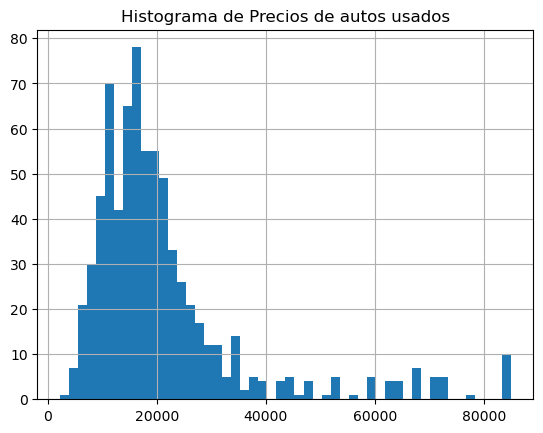

In [4]:
# Vemos el histograma de precios de autos usados
plt.hist(df['precio'], bins=50)
plt.title('Histograma de Precios de autos usados')
plt.grid()
plt.show()

In [8]:
#Veamos el reporte del dataset:
profile = ProfileReport(df, title="Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Del reporte, vemos que hay features con datos faltantes, como el color del auto, el valor del precio nuevo (que fue obtenido desde la página de la concesionaria) pero se dejo de hacer porque era un trabajo muy manual y exhaustivo.
Tambien el tipo de combustible es en su mayoria (97.5%) gasolina (nafta)
Vemos conveniente no utilizar las features:
- **color**: datos faltantes
- **id_auto**: irrelevante porque es una id
- **publicacion**: esta mas orientado para un analisis NLP
- **modelo**: Esta feature se usó y nos dio un error bajo, pero el algoritmo no es robusto, con lo cual, al final terminamos usando la marca.
- **Combustible**: desbalanceado, el 97% es nafta
- **precio_nuevo**: incompleta.

In [9]:
#Cuantos modelos distintos son?
print(df['modelo_std'].value_counts())

modelo_std
Vitara                27
Alto                  23
CX-5                  19
I-10                  17
Grand Vitara          17
                      ..
Niva Urban             1
Cerato                 1
Idea 1.8 Adventure     1
FOX                    1
Hiace                  1
Name: count, Length: 215, dtype: int64


In [10]:
#Veamos los datos faltantes:
df.isna().sum()

,0
id_auto,0
publicacion,0
marca,0
modelo,0
precio,0
Motor,0
Ano,0
Tipo,0
Combustible,7
Color,16


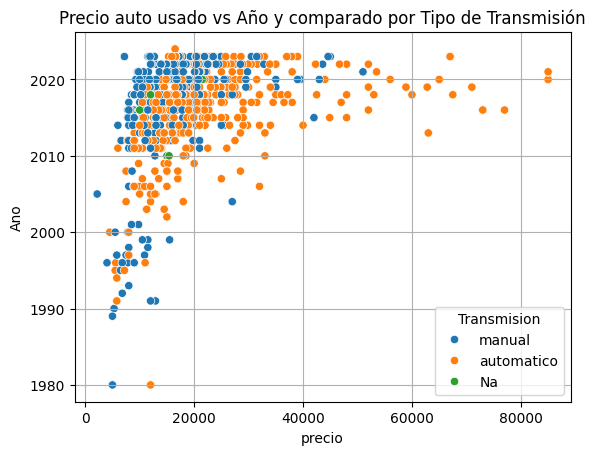

In [11]:
#Precio auto usado vs Año y comparado por Tipo de Transmisión
sns.scatterplot(data=df, x='precio', y= 'Ano',hue='Transmision')
plt.grid()
plt.title('Precio auto usado vs Año y comparado por Tipo de Transmisión')
plt.show()
#Vemos que en general, los vehículos de transmisión automática son mas caros

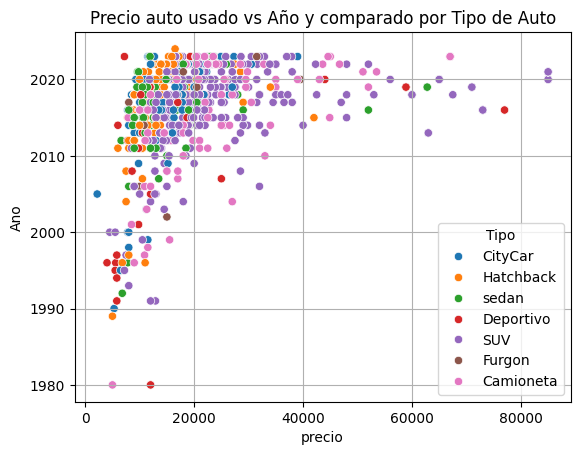

In [12]:
# Precio auto usado vs Año y comparado por Tipo de Auto
sns.scatterplot(data=df, x='precio', y= 'Ano',hue='Tipo')
plt.grid()
plt.title('Precio auto usado vs Año y comparado por Tipo de Auto')
plt.show()
#En general, SUV son mas caros que hatchback o sedán, o furgón

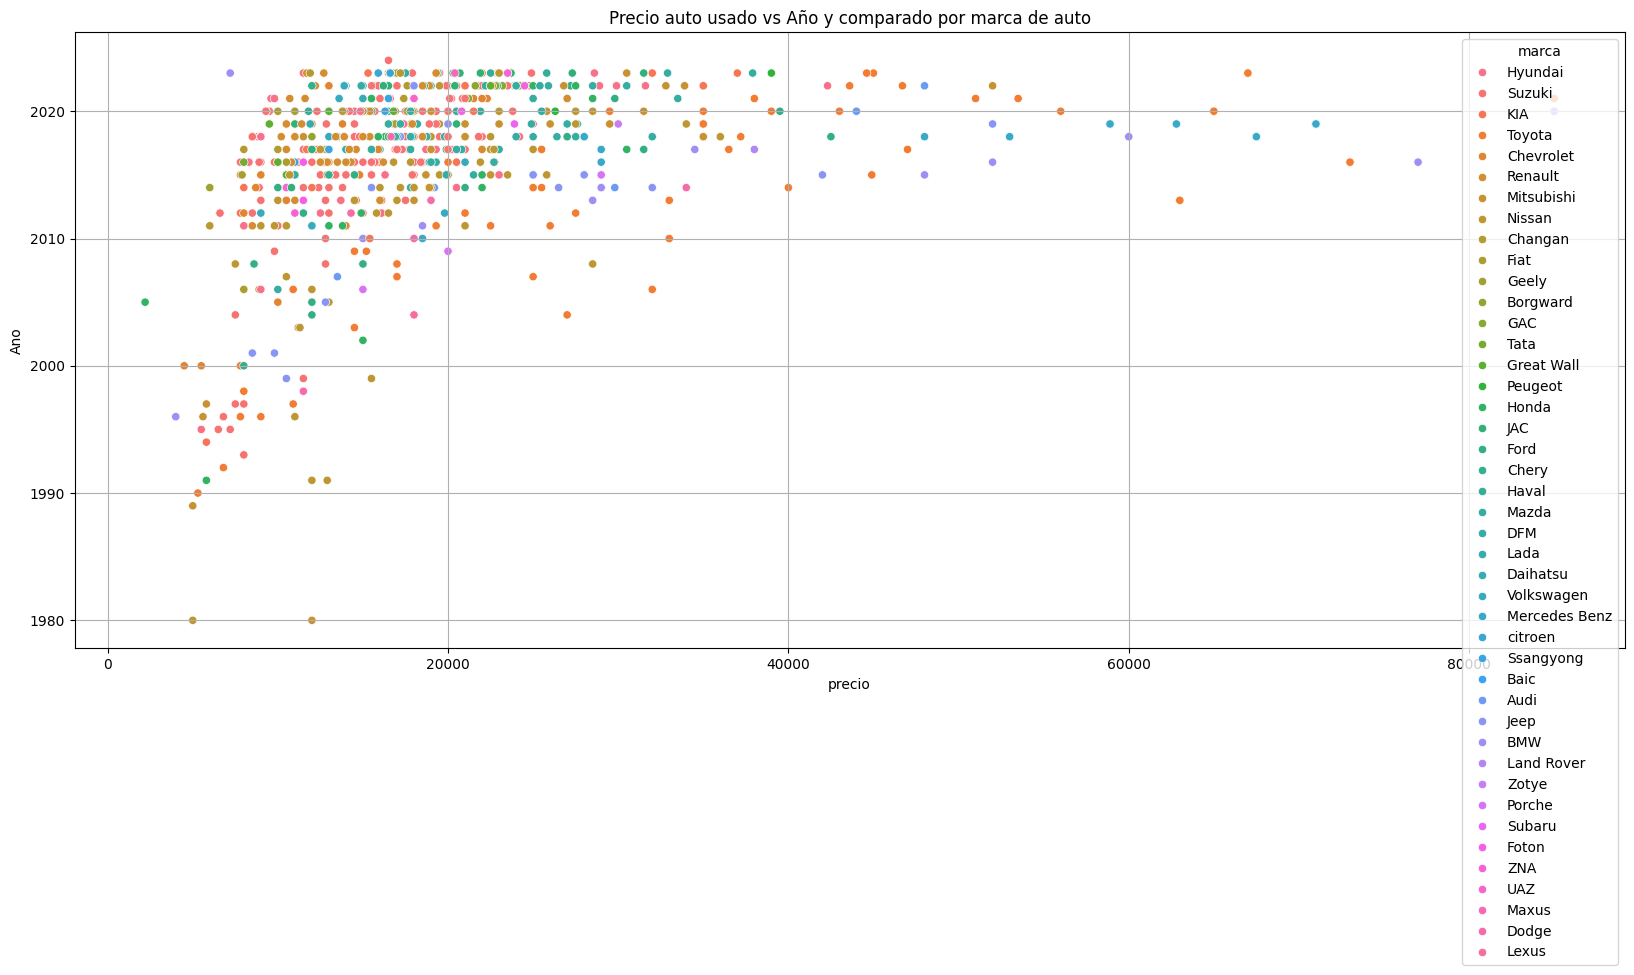

In [13]:
# Precio auto usado vs Año y comparado por marca de auto
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x='precio', y= 'Ano',hue='marca')  #44 marcas en total
plt.grid()
plt.title('Precio auto usado vs Año y comparado por marca de auto')
plt.show()

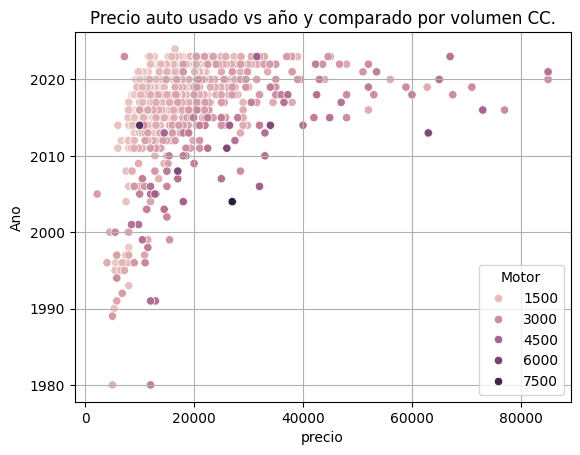

In [14]:
# Precio auto usado vs Año y comparado por volumen cilindrada
df['Motor'] = df['Motor'].str.replace(' Lt.', '').astype('float')*1000
sns.scatterplot(data=df, x='precio', y= 'Ano', hue='Motor')
plt.grid()
plt.title('Precio auto usado vs año y comparado por volumen CC.')
plt.show()
#En general motores mas pequeños tienden a ser más económicos para el mismo año

Vemos que autos con motor mas grande, tienen precios mas altos comparados con sus otros autos del mismo año.

Text(0.5, 1.0, 'Distribución del Precio de Autos Usados por Marca')

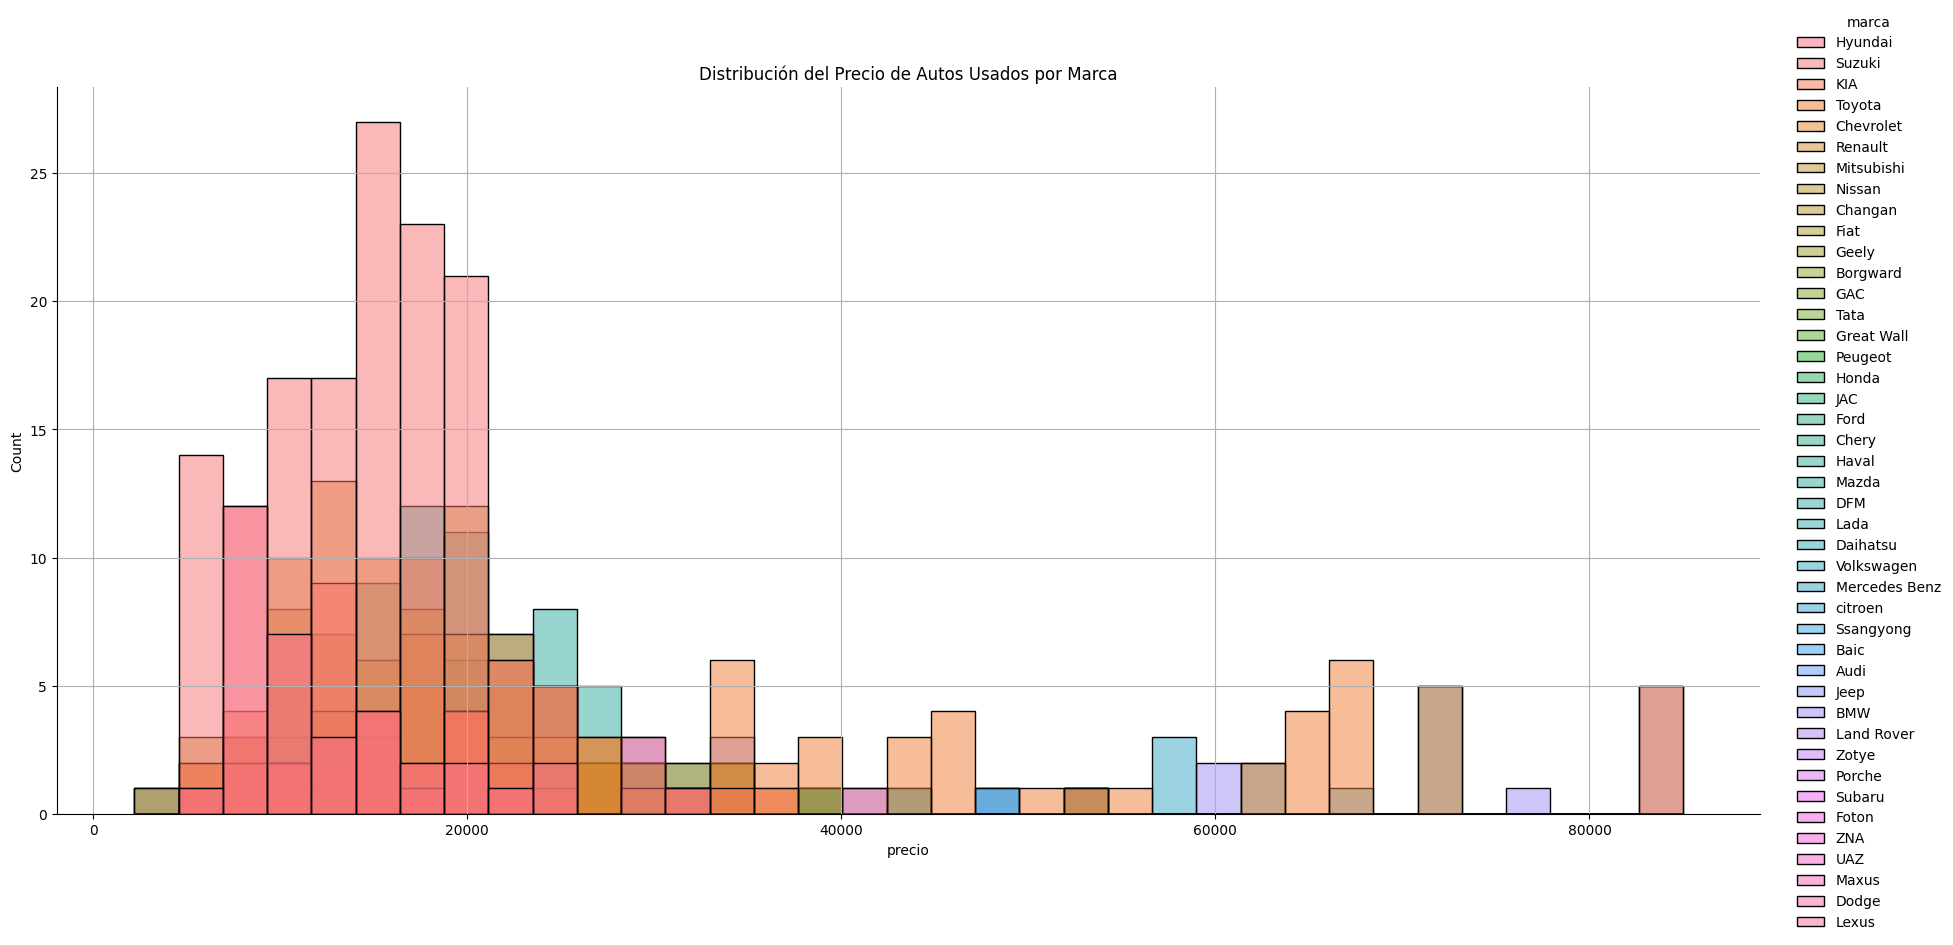

In [15]:
#Veamos la versión mejorada, vamos a hacer un gráfico del precio promedio por marca:
# Ajusta el tamaño del gráfico con height y aspect
sns.displot(data=df, x='precio', hue='marca', height=8, aspect=2.25)
plt.grid()
plt.title('Distribución del Precio de Autos Usados por Marca')

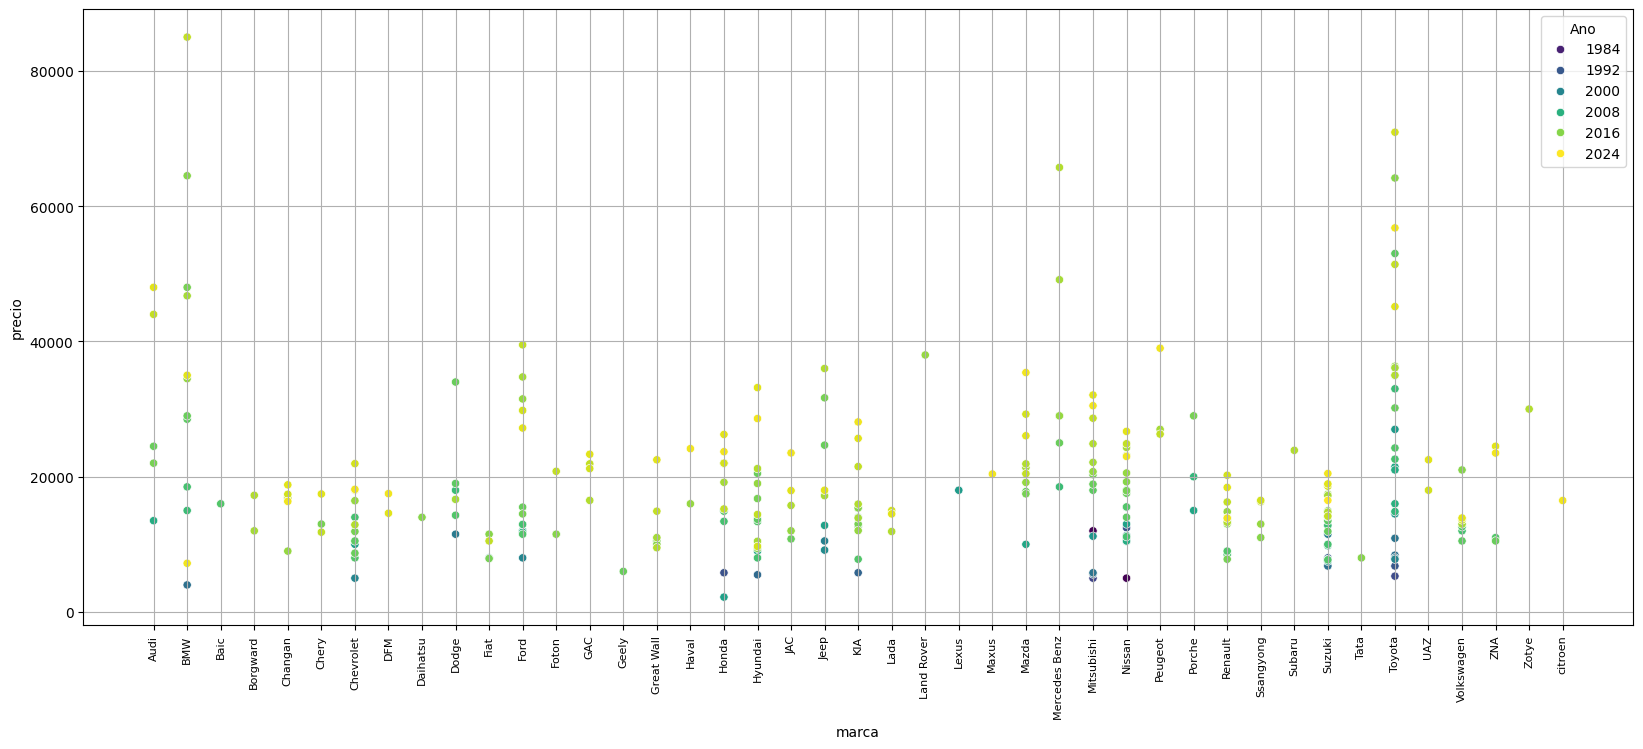

In [16]:
#Ahora veamos el precio promedio por marca por año
grouped_df = df.groupby(by=['marca', 'Ano'])['precio'].mean().reset_index()

plt.figure(figsize=(20, 8))

palette = sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(data=grouped_df, x = 'marca', y = 'precio', hue='Ano', palette = palette)
plt.grid()
# Ajustar las etiquetas del eje x
plt.xticks(rotation=90, fontsize=8)
plt.show()
#notar la influencia de las marcas BMW, Mercedes y Toyota

El gráfico nos muestra que los autos de las marcas BMW, Toyota, Mercedes parecieran ser los mas caros

Text(0.5, 1.0, 'Boxplot del target')

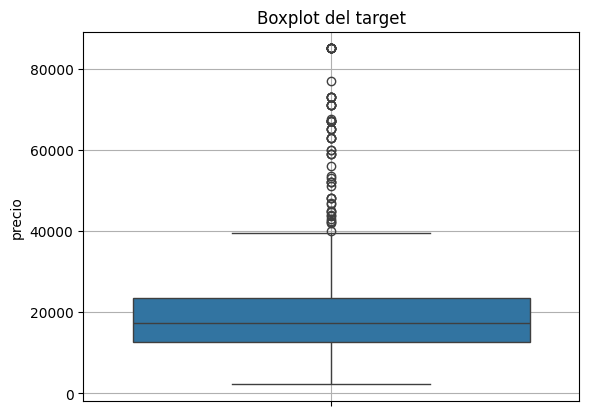

In [17]:
#Hacemos el boxplot del target:
sns.boxplot(data=df, y='precio')
plt.grid()
plt.title('Boxplot del target')
#Vemos el comportamiento que existen autos tan caros que parecen outliers

In [18]:
#Conforme con el DEA vamos a guardar el df para hacer un modelo predictivo del precio en base a features:
df.drop(columns=['id_auto', 'publicacion', 'modelo', 'Combustible', 'Color', 'precio_nuevo'], inplace=True)

df.select_dtypes(include=['float64', 'integer']).corr()

,precio,Motor,Ano
precio,1.000000,0.533483,0.313130
Motor,0.533483,1.000000,-0.246551
Ano,0.313130,-0.246551,1.000000


In [19]:
df.to_pickle('df_para_ml_03_07.pickle')


# Veamos la correlación entre variables categóricas y el precio:
El ANOVA de una vía (one-way ANOVA) se utiliza para comparar la media de la variable continua entre las diferentes categorías.

In [20]:
df.columns

Index(['marca', 'precio', 'Motor', 'Ano', 'Tipo', 'modelo_std', 'Transmision'], dtype='object')

In [21]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

# Realizar ANOVA de una vía
model = ols('precio ~ C(marca)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
#Vemos de la tabla que el PR(>F) es menor al alpha=0.05
#podemos rechazar la hipótesis nula, lo que sugiere que hay al menos una diferencia significativa entre las medias de las marcas.
#Entonces la marca es un feature importante.


                sum_sq     df          F        PR(>F)
C(marca)  7.878741e+10   42.0  14.967231  1.768500e-71
Residual  8.622923e+10  688.0        NaN           NaN


In [22]:
#Veamos lo mismo para el Tipo de auto:
model = ols('precio ~ C(Tipo)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
#Vemos de la tabla que el PR(>F) es menor al alpha=0.05
#podemos rechazar la hipótesis nula, lo que sugiere que hay al menos una diferencia significativa entre las medias de las Tipo Coche.
#Entonces El Tipo de coche es un feature importante.


                sum_sq     df          F        PR(>F)
C(Tipo)   2.197496e+10    6.0  18.537568  4.137834e-20
Residual  1.430417e+11  724.0        NaN           NaN


In [23]:
import numpy as np
import pandas as pd

df = pd.read_pickle('df_para_ml_03_07.pickle')
df.drop(columns = ['modelo_std'], inplace=True)

df = df.reset_index(drop=True)

#categorical_columns = ['modelo_std', 'Transmision']
categorical_columns = ['marca', 'Tipo', 'Transmision']
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#Que interesante que el motor y el año del auto sean las variables mas relevantes.
#También el modelo X6 (BMW) y GLE (Mercedez) hace que aumente el precio considerablemente

In [24]:
#Vemos la correlación entre variables:
correlation_matrix = df_dummies.corr()
print(correlation_matrix['precio'].sort_values(ascending=False))

precio                    1.000000
Motor                     0.533483
marca_Toyota              0.440181
Transmision_automatico    0.341150
marca_Mercedes Benz       0.335145
Ano                       0.313130
marca_BMW                 0.294727
Tipo_SUV                  0.283865
marca_Land Rover          0.040940
marca_Peugeot             0.040103
marca_Zotye               0.021233
marca_Mazda               0.012573
marca_Jeep                0.012272
marca_GAC                 0.009268
marca_Mitsubishi          0.007169
marca_Subaru              0.006207
marca_Haval               0.000226
marca_Porche             -0.000201
marca_Maxus              -0.002415
marca_UAZ                -0.003941
marca_Lexus              -0.008327
marca_Baic               -0.013254
marca_Dodge              -0.014968
marca_Daihatsu           -0.018181
marca_ZNA                -0.019775
marca_Ford               -0.021942
Tipo_Furgon              -0.021951
marca_JAC                -0.024261
marca_Borgward      

# Modelos de Aprendizaje Automático
## Separación del conjunto de entrenamiento y testeo

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Separar las características y el target
X = df_dummies.drop(columns='precio')

y = df_dummies['precio']
#Separamos en train y test:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(x_train)

#Escalamos la y para tratar de opacar el efecto de los precios de autos caros
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1))
#Escalamos las y_test
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1))


In [26]:
from joblib import dump, load

dump(scaler_x, 'x_scaler.joblib')
expected_columns = scaler_x.feature_names_in_
print(expected_columns)


['Motor' 'Ano' 'marca_BMW' 'marca_Baic' 'marca_Borgward' 'marca_Changan'
 'marca_Chery' 'marca_Chevrolet' 'marca_DFM' 'marca_Daihatsu'
 'marca_Dodge' 'marca_Fiat' 'marca_Ford' 'marca_Foton' 'marca_GAC'
 'marca_Geely' 'marca_Great Wall' 'marca_Haval' 'marca_Honda'
 'marca_Hyundai' 'marca_JAC' 'marca_Jeep' 'marca_KIA' 'marca_Lada'
 'marca_Land Rover' 'marca_Lexus' 'marca_Maxus' 'marca_Mazda'
 'marca_Mercedes Benz' 'marca_Mitsubishi' 'marca_Nissan' 'marca_Peugeot'
 'marca_Porche' 'marca_Renault' 'marca_Ssangyong' 'marca_Subaru'
 'marca_Suzuki' 'marca_Tata' 'marca_Toyota' 'marca_UAZ' 'marca_Volkswagen'
 'marca_ZNA' 'marca_Zotye' 'marca_citroen' 'Tipo_CityCar' 'Tipo_Deportivo'
 'Tipo_Furgon' 'Tipo_Hatchback' 'Tipo_SUV' 'Tipo_sedan'
 'Transmision_automatico' 'Transmision_manual']


## Random Forest
Implementamos un proceso de optimización de hiperparámetros para un modelo de Random Forest Regressor utilizando la técnica de búsqueda en cuadrícula (Grid Search).
Especificamos los siguientes rangos de valores a explorar para tres hiperparámetros:

* **n_estimators**: Número de árboles, variando de 10 a 55 en incrementos de 5.
* **max_depth**: Profundidad máxima de los árboles, variando de 2 a 11 en incrementos de 3.
* **min_samples_split**: Número mínimo de muestras requeridas para dividir un nodo interno, variando de 2 a 8 en incrementos de 2.

Configuramos GridSearchCV con los siguientes parámetros:

* **refit=False**: No se reajusta el mejor modelo encontrado en todos los datos.
* **cv=3**: Utiliza validación cruzada de 3 pliegues.
* **scoring='neg_root_mean_squared_error'**: Utiliza el negativo de la raíz del error cuadrático medio como métrica de evaluación.
* **n_jobs=-1**: Utiliza todos los núcleos de CPU disponibles para paralelizar la búsqueda.

In [27]:
# Importar cross_val_score para la validación cruzada
from sklearn.model_selection import GridSearchCV
# Importar RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

rfr = RandomForestRegressor()

rfc_hyperparams = {
    "n_estimators": np.arange(10, 60, 5),
    "max_depth": np.arange(2, 12, 3),
    "min_samples_split": np.arange(2, 10, 2)  # min_samples_split debe ser al menos 2
}
# Creamos un método de busqueda por grilla:
grid = GridSearchCV(rfr,
                    rfc_hyperparams,
                    refit=False,
                    cv=3,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1)

grid.fit(X_train_scaled, y_train_scaled)



GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  5,  8, 11]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])},
             refit=False, scoring='neg_root_mean_squared_error')

In [28]:
#Veamos las mejores hyperparametros
grid.best_params_

{'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 15}

Estos parámetros indican que el modelo óptimo utiliza un bosque de 55 árboles, cada uno con una profundidad máxima de 11 niveles, y permite la división de nodos con un mínimo de 2 muestras.

### Implementación y evaluación del modelo:
Se crea un nuevo modelo Random Forest con los hiperparámetros optimizados y se entrena con los datos de entrenamiento escalados. Luego, se realizan predicciones sobre el conjunto de prueba y se evalua el rendimiento del modelo utilizando dos métricas: Error Absoluto Medio (MAE) y Error Cuadrático Medio (MSE).

In [29]:
best_rfc_grid = RandomForestRegressor(**grid.best_params_)
best_rfc_grid.fit(X_train_scaled, y_train_scaled)

#Evaluamos
y_pred_scaled  = best_rfc_grid.predict(scaler_x.transform(x_test))

#MAE y MSE en escala escalada
print('MAE en escala falsa: ', mean_absolute_error(y_test_scaled, y_pred_scaled))
print('MSE en escala falsa: ', mean_squared_error(y_test_scaled, y_pred_scaled))

#Necesitamos el MAE y MSE en la escala real:
y_pred_original_rf = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))

mae_original = mean_absolute_error(y_test, y_pred_original_rf)
mse_original = mean_squared_error(y_test, y_pred_original_rf)

print('MAE en escala real: ', mae_original)
print('MSE en escala real: ', mse_original**0.5)


MAE en escala falsa:  0.036783464674645
MSE en escala falsa:  0.003286664903769738
MAE en escala real:  3045.6708750606062
MSE en escala real:  4746.877785856796


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


El modelo recientemente desarrollado muestra un rendimiento subóptimo. Un error cuadrático medio (MSE) de 5000 USD se considera excesivo para vehículos en el rango de precios de 10.000 a 20.000 USD, lo que indica una baja precisión en la predicción de precios para este segmento. Para automóviles en la gama de precios superior a 40.000 USD, este nivel de error podría ser más aceptable debido a la mayor variabilidad en las características y precios en este segmento.
Sin embargo, en términos generales, el rendimiento del modelo no cumple con los estándares de precisión requeridos para una implementación efectiva. Continuaremos iterando y refinando nuestro enfoque para desarrollar un modelo más robusto y preciso. Como siguiente paso, implementaremos un método de ensemble learning, específicamente un algoritmo de bagging, con el objetivo de reducir la varianza y mejorar la capacidad de generalización del modelo.

## Bagging
Implementamos y evaluamos un conjunto de modelos de regresión utilizando técnicas de ensemble learning, específicamente el método de Bagging (Bootstrap Aggregating).
Utilizamos cuatro modelos de regresión diferentes:

* RandomForestRegressor: Utiliza los hiperparámetros optimizados previamente.
* SVR (Support Vector Regression): Con parámetros C=1.0 y epsilon=0.1.
* Ridge: Regresión con regularización L2, alpha=0.12.
* GradientBoostingRegressor: Con 100 estimadores, tasa de aprendizaje de 0.1 y profundidad máxima de 3.

Este enfoque de ensemble learning busca mejorar la robustez y la precisión del modelo al combinar múltiples estimadores base, reduciendo así el overfitting y mejorando la capacidad de generalización del modelo final.

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import numpy as np

# Definimos los clasificadores y sus hiperparámetros:
#Vamos a usar el random forest anterior con sus hiperparametros
estimators = {
    'RandomForest' : RandomForestRegressor(**grid.best_params_),
    'SVR' : SVR(C=1.0, epsilon=0.1),
    'Ridge' : Ridge(alpha=0.12),
    'GradientBoosting' : GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                                   max_depth=3, random_state=42)
}

# Ensamblamos y evaluamos el 'consenso' de todos los modelos:
for name, estimator in estimators.items():
    bag_class = BaggingRegressor(base_estimator=estimator, n_estimators=50, random_state=42).fit(X_train_scaled, y_train_scaled)
    bag_predict = bag_class.predict(scaler_x.transform(x_test))
    print('='*64)
    print(f'SCORE Bagging with {name} : {mean_squared_error(bag_predict, y_test_scaled):.4f}',
          f'Error Abs: {mean_absolute_error(bag_predict, y_test_scaled):.4f}')

# Guardamos el modelo final:
joblib.dump(bag_class, 'bagging_model_car_model_03_07.pickle')

# Vemos la importancia de las características para RandomForest o GradientBoosting:
if hasattr(bag_class, 'estimators_') and hasattr(bag_class.estimators_[0], 'feature_importances_'):
    rf_importance = np.mean([est.feature_importances_ for est in bag_class.estimators_], axis=0)
    for feature_name, importance in zip(x_train.columns, rf_importance):
        print(f'{feature_name}: {importance:.4f}')
else:
    print("El modelo final no soporta la evaluación de importancia de características.")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SCORE Bagging with RandomForest : 0.0033 Error Abs: 0.0373


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SCORE Bagging with SVR : 0.0061 Error Abs: 0.0612


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SCORE Bagging with Ridge : 0.0069 Error Abs: 0.0524


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SCORE Bagging with GradientBoosting : 0.0036 Error Abs: 0.0387
Motor: 0.3504
Ano: 0.3786
marca_BMW: 0.0549
marca_Baic: 0.0000
marca_Borgward: 0.0002
marca_Changan: 0.0002
marca_Chery: 0.0007
marca_Chevrolet: 0.0003
marca_DFM: 0.0002
marca_Daihatsu: 0.0000
marca_Dodge: 0.0001
marca_Fiat: 0.0000
marca_Ford: 0.0010
marca_Foton: 0.0003
marca_GAC: 0.0001
marca_Geely: 0.0000
marca_Great Wall: 0.0005
marca_Haval: 0.0000
marca_Honda: 0.0004
marca_Hyundai: 0.0005
marca_JAC: 0.0008
marca_Jeep: 0.0002
marca_KIA: 0.0017
marca_Lada: 0.0002
marca_Land Rover: 0.0024
marca_Lexus: 0.0000
marca_Maxus: 0.0000
marca_Mazda: 0.0001
marca_Mercedes Benz: 0.0424
marca_Mitsubishi: 0.0008
marca_Nissan: 0.0008
marca_Peugeot: 0.0045
marca_Porche: 0.0005
marca_Renault: 0.0033
marca_Ssangyong: 0.0005
marca_Subaru: 0.0000
marca_Suzuki: 0.0002
marca_Tata: 0.0000
marca_Toyota: 0.0745
marca_UAZ: 0.0004
marca_Volkswagen: 0.0001
marca_ZNA: 0.0000
marca_Zotye: 0.0001
marca_citroen: 0.0003
Tipo_CityCar: 0.0004
Tipo_Deportiv

In [31]:
#Necesitamos el MAE y MSE en la escala real:
bag_pred_original = scaler_y.inverse_transform(bag_predict.reshape(-1,1))

mae_original = mean_absolute_error(y_test, bag_pred_original)
mse_original = mean_squared_error(y_test, bag_pred_original)

print('MAE en escala real: ', mae_original)  #MAE:  3203.1
print('MSE en escala real: ', mse_original**0.5)   #MSE:  4933.5

#Hasta ahora este es el mejor


MAE en escala real:  3203.1486952526056
MSE en escala real:  4933.571435430651


## Modelo regresor de votación
Este modelo es un meta-estimador que combina múltiples modelos de regresión base para producir predicciones finales basadas en un promedio ponderado o la mediana de las predicciones de los estimadores base.
[Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)

Se utilizan los siguiente estimadores:

* **RandomForest**: Utiliza los hiperparámetros optimizados previamente mediante GridSearchCV.
* **SVR** (Support Vector Regression): Con parámetros C=1.0 y epsilon=0.1.
* **Ridge**: Regresión con regularización L2, alpha=0.12.
* **GradientBoosting**: Con 100 estimadores, tasa de aprendizaje de 0.1 y profundidad máxima de 3.

In [32]:
#Probemos con un voting ensamble:

from sklearn.ensemble import VotingRegressor

# El voting regressor nos pide que sea una lista, el bagging nos pedia dictionario:

estimators = [
    ('RandomForest', RandomForestRegressor(**grid.best_params_)),
    ('SVR', SVR(C=1.0, epsilon=0.1)),
    ('Ridge', Ridge(alpha=0.12)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                                   max_depth=3, random_state=42))
]

voting_regressor = VotingRegressor(estimators=estimators)

# Entrenar el VotingRegressor:
voting_regressor.fit(X_train_scaled, y_train_scaled)

# Predecir con el modelo VotingRegressor:
voting_predictions = voting_regressor.predict(scaler_x.transform(x_test))

# Evaluar el desempeño:
mse = mean_squared_error(voting_predictions, y_test_scaled)
mae = mean_absolute_error(voting_predictions, y_test_scaled)
print('='*64)
print(f'SCORE VotingRegressor : {mse:.4f}', f'Error Abs: {mae:.4f}')

# Guardar el modelo:
joblib.dump(voting_regressor, 'voting_model_car_model_03_07.pickle')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SCORE VotingRegressor : 0.0034 Error Abs: 0.0391


['voting_model_car_model_03_07.pickle']

In [33]:
#Necesitamos el MAE y MSE en la escala real:
voting_predictions_original = scaler_y.inverse_transform(voting_predictions.reshape(-1,1))

mae_original = mean_absolute_error(y_test, voting_predictions_original)
mse_original = mean_squared_error(y_test, voting_predictions_original)

print('MAE en escala real: ', mae_original)
print('MSE en escala real: ', mse_original**0.5)

#Bagging sigue siendo el mejor

MAE en escala real:  3235.5023463421007
MSE en escala real:  4843.875669351698


In [34]:
#Veamos las feature_importance del voting:
for i in zip(voting_regressor.estimators_[0].feature_importances_, X.columns):
  print(i)

(0.37129025858801795, 'Motor')
(0.4039232513141792, 'Ano')
(0.03127506832812605, 'marca_BMW')
(0.0, 'marca_Baic')
(0.00022539004950416307, 'marca_Borgward')
(0.0003717777987082498, 'marca_Changan')
(0.00069232993678486, 'marca_Chery')
(0.0008086283997176399, 'marca_Chevrolet')
(4.765582142784095e-05, 'marca_DFM')
(0.0, 'marca_Daihatsu')
(0.0001351205275195833, 'marca_Dodge')
(9.466078763670993e-07, 'marca_Fiat')
(0.0017542205431404039, 'marca_Ford')
(0.00038954750615691555, 'marca_Foton')
(0.00041337305945165305, 'marca_GAC')
(0.0, 'marca_Geely')
(0.0001998492949173158, 'marca_Great Wall')
(3.60410530471136e-05, 'marca_Haval')
(0.0027796921946393735, 'marca_Honda')
(0.0018893622330112146, 'marca_Hyundai')
(0.0004646246465028448, 'marca_JAC')
(0.0024142400149094957, 'marca_Jeep')
(0.0019010310093022695, 'marca_KIA')
(0.00014467369311702442, 'marca_Lada')
(0.0022284001554074926, 'marca_Land Rover')
(4.718016763136577e-05, 'marca_Lexus')
(2.371474182691553e-06, 'marca_Maxus')
(0.000599906

## CatBoost
CatBoost es un algoritmo de boosting de gradiente que ha demostrado un rendimiento excepcional en muchos problemas de regresión y clasificación. [CatBoost](https://catboost.ai/)

Se definen los siguientes hiperparámetros a optimizar:

* **'iterations'**: Número de árboles en el modelo (500, 1000, 1500).
* **'learning_rate'**: Tasa de aprendizaje (0.01, 0.1).
* **'depth'**: Profundidad máxima de los árboles (6, 8).
* **'l2_leaf_reg'**: Coeficiente de regularización L2 (3, 5). Ayuda a prevenir el sobreajuste.
* **'border_count'**: Número de bordes para binarizar características numéricas (32, 64).

Configuramos GridSearchCV con los siguientes parámetros:

* Se configura con validación cruzada de 4 pliegues (cv=4) para proporcionar una estimación más robusta del rendimiento del modelo en datos no vistos.
* La métrica de evaluación es el negativo del error cuadrático medio ('neg_mean_squared_error').
* Se utilizan todos los núcleos disponibles (n_jobs=-1) para paralelizar la búsqueda.

La búsqueda en cuadrícula realizada explora un total de 48 combinaciones diferentes de hiperparámetros (3 * 2 * 2 * 2 * 2 = 48).






In [35]:
#Probemos con catboost:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


In [36]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

X_train_scaled = pd.DataFrame(scaler_x.transform(x_train), columns=x_train.columns)
X_test_scaled = pd.DataFrame(scaler_x.transform(x_test), columns=x_test.columns)

# Crear pools de datos de CatBoost
train_pool = Pool(X_train_scaled, y_train_scaled)
test_pool = Pool(X_test_scaled, y_test_scaled)

# Definir el modelo base
model = CatBoostRegressor(
    random_seed=42,
    verbose=True
)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1],
    'depth': [6, 8],
    'l2_leaf_reg': [3, 5],
    'border_count': [32, 64]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=4,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1
)

# Ajustar GridSearchCV
grid_search.fit(X_train_scaled, y_train_scaled)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)


Fitting 4 folds for each of 48 candidates, totalling 192 fits
0:	learn: 0.1843530	total: 47.8ms	remaining: 1m 11s
1:	learn: 0.1832730	total: 49.9ms	remaining: 37.4s
2:	learn: 0.1821718	total: 51.1ms	remaining: 25.5s
3:	learn: 0.1810646	total: 53.8ms	remaining: 20.1s
4:	learn: 0.1799683	total: 58.7ms	remaining: 17.6s
5:	learn: 0.1790246	total: 60ms	remaining: 14.9s
6:	learn: 0.1779486	total: 61.3ms	remaining: 13.1s
7:	learn: 0.1768662	total: 62.5ms	remaining: 11.7s
8:	learn: 0.1757948	total: 64.2ms	remaining: 10.6s
9:	learn: 0.1748534	total: 64.8ms	remaining: 9.65s
10:	learn: 0.1738098	total: 65.2ms	remaining: 8.83s
11:	learn: 0.1728145	total: 68.8ms	remaining: 8.53s
12:	learn: 0.1718083	total: 71.4ms	remaining: 8.17s
13:	learn: 0.1708813	total: 74.1ms	remaining: 7.87s
14:	learn: 0.1698396	total: 77ms	remaining: 7.62s
15:	learn: 0.1689356	total: 80.5ms	remaining: 7.46s
16:	learn: 0.1679605	total: 83.8ms	remaining: 7.31s
17:	learn: 0.1670397	total: 86.2ms	remaining: 7.1s
18:	learn: 0.166

Los mejores parámetros obtenidos son:

* **'iterations'**: Número de árboles en el modelo (1500).
* **'learning_rate'**: Tasa de aprendizaje (0.01).
* **'depth'**: Profundidad máxima de los árboles (8).
* **'l2_leaf_reg'**: Coeficiente de regularización L2 (3).
* **'border_count'**: Número de bordes para binarizar características numéricas (32).

In [37]:
# Evaluar el mejor modelo en el conjunto de prueba
y_pred_cat = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred_cat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_cat)
mae = mean_absolute_error(y_test_scaled, y_pred_cat)

print(f"RMSE: {rmse}")  #0.05428
print(f"R2 Score: {r2}") #0.8909
print(f"MAE Score: {mae}") #0.036


RMSE: 0.054285341222703704
R2 Score: 0.8909949347923254
MAE Score: 0.03677142958254725


In [38]:
#PAsamos a la escala Original:
y_pred_cat = best_model.predict(X_test_scaled)

y_pred_cat_original = scaler_y.inverse_transform(y_pred_cat.reshape(147,1))

mse = mean_squared_error(y_test, y_pred_cat_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_cat_original)
mae = mean_absolute_error(y_test, y_pred_cat_original)

print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"MAE Score: {mae}")


RMSE: 4494.826253239866
R2 Score: 0.8909949347923254
MAE Score: 3044.6743694349125


Vemos que supera al Voting Regressor por poco.

In [39]:
from catboost import CatBoostRegressor, Pool
best_model.save_model('catboost_model.cbm')

#loaded_model = CatBoostRegressor()
#loaded_model.load_model('catboost_model.cbm')
columnas_modelo = best_model.feature_names_
print(columnas_modelo)

['Motor', 'Ano', 'marca_BMW', 'marca_Baic', 'marca_Borgward', 'marca_Changan', 'marca_Chery', 'marca_Chevrolet', 'marca_DFM', 'marca_Daihatsu', 'marca_Dodge', 'marca_Fiat', 'marca_Ford', 'marca_Foton', 'marca_GAC', 'marca_Geely', 'marca_Great Wall', 'marca_Haval', 'marca_Honda', 'marca_Hyundai', 'marca_JAC', 'marca_Jeep', 'marca_KIA', 'marca_Lada', 'marca_Land Rover', 'marca_Lexus', 'marca_Maxus', 'marca_Mazda', 'marca_Mercedes Benz', 'marca_Mitsubishi', 'marca_Nissan', 'marca_Peugeot', 'marca_Porche', 'marca_Renault', 'marca_Ssangyong', 'marca_Subaru', 'marca_Suzuki', 'marca_Tata', 'marca_Toyota', 'marca_UAZ', 'marca_Volkswagen', 'marca_ZNA', 'marca_Zotye', 'marca_citroen', 'Tipo_CityCar', 'Tipo_Deportivo', 'Tipo_Furgon', 'Tipo_Hatchback', 'Tipo_SUV', 'Tipo_sedan', 'Transmision_automatico', 'Transmision_manual']


In [40]:
#Guardamos el catboosting model:
joblib.dump(best_model, 'catboosting_model_car_model_17_08.pickle')


['catboosting_model_car_model_17_08.pickle']

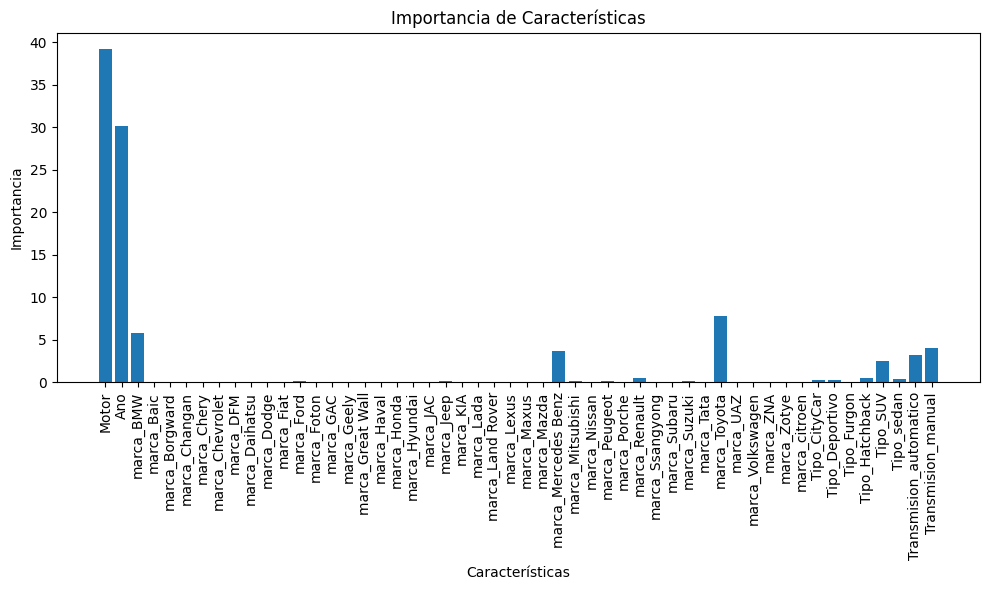

In [41]:
# Graficar la importancia de las características
import matplotlib.pyplot as plt

feature_importance = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Importancia de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Vemos que las importancia de las caracteristicas es coherente con lo esperado, ya que el:
- Tamaño del motor: mayor potencia -> más caro
- Año: vehículos más nuevos indican precios más altos.
- Marcas como BMW, Toyota y Mercedes Benz, son consideradas de mejor calidad y por ende mayor precio y menos pérdida de valor en el tiempo comparada con marcas chinas.
- El tipo de transmision tambien el modelo lo captura como importante.

Comparando el MAE entre todos los modelos, el menor es del Catboost Regressor. Nos quedamos con este modelo.

## Pruebas de predicción

In [42]:
import joblib

#model = joblib.load('catboosting_model_car_model.pickle')
loaded_model = CatBoostRegressor()
loaded_model.load_model('catboost_model.cbm')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('df_para_ml_03_07.pickle')
#df.drop(columns = ['marca', 'Tipo'], inplace=True)
df.drop(columns = ['modelo_std'], inplace=True)
df = df.dropna()
df = df.reset_index(drop=True)


In [43]:
#Preprocesamiento:
categorical_columns = ['marca', 'Tipo', 'Transmision']
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#Vemos la correlacion entre variables:
correlation_matrix = df_dummies.corr()
print(correlation_matrix['precio'].sort_values(ascending=False))



precio                    1.000000
Motor                     0.533483
marca_Toyota              0.440181
Transmision_automatico    0.341150
marca_Mercedes Benz       0.335145
Ano                       0.313130
marca_BMW                 0.294727
Tipo_SUV                  0.283865
marca_Land Rover          0.040940
marca_Peugeot             0.040103
marca_Zotye               0.021233
marca_Mazda               0.012573
marca_Jeep                0.012272
marca_GAC                 0.009268
marca_Mitsubishi          0.007169
marca_Subaru              0.006207
marca_Haval               0.000226
marca_Porche             -0.000201
marca_Maxus              -0.002415
marca_UAZ                -0.003941
marca_Lexus              -0.008327
marca_Baic               -0.013254
marca_Dodge              -0.014968
marca_Daihatsu           -0.018181
marca_ZNA                -0.019775
marca_Ford               -0.021942
Tipo_Furgon              -0.021951
marca_JAC                -0.024261
marca_Borgward      

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Separar las características y el target
X = df_dummies.drop(columns='precio')

y = df_dummies['precio']
#Separamos en train y test:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(x_train)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1))


#Creamos un auto ficticio para predecir el precio
def predecir_precio(auto):
    auto_df = pd.DataFrame([auto])
    auto_df = auto_df.astype({'Motor': 'float', 'Ano': 'int'})
    auto_scaled = scaler_x.transform(auto_df)
    return loaded_model.predict(auto_scaled)


In [45]:
#Veamos un registro:
auto = X.loc[10].to_dict()
auto

{'Motor': 1000.0,
 'Ano': 2020,
 'marca_BMW': False,
 'marca_Baic': False,
 'marca_Borgward': False,
 'marca_Changan': False,
 'marca_Chery': False,
 'marca_Chevrolet': False,
 'marca_DFM': False,
 'marca_Daihatsu': False,
 'marca_Dodge': False,
 'marca_Fiat': False,
 'marca_Ford': False,
 'marca_Foton': False,
 'marca_GAC': False,
 'marca_Geely': False,
 'marca_Great Wall': False,
 'marca_Haval': False,
 'marca_Honda': False,
 'marca_Hyundai': False,
 'marca_JAC': False,
 'marca_Jeep': False,
 'marca_KIA': False,
 'marca_Lada': False,
 'marca_Land Rover': False,
 'marca_Lexus': False,
 'marca_Maxus': False,
 'marca_Mazda': False,
 'marca_Mercedes Benz': False,
 'marca_Mitsubishi': False,
 'marca_Nissan': False,
 'marca_Peugeot': False,
 'marca_Porche': False,
 'marca_Renault': False,
 'marca_Ssangyong': False,
 'marca_Subaru': False,
 'marca_Suzuki': True,
 'marca_Tata': False,
 'marca_Toyota': False,
 'marca_UAZ': False,
 'marca_Volkswagen': False,
 'marca_ZNA': False,
 'marca_Zotye'

In [46]:
#Vamos a ver el precio de un kicks 2022 automatico de motor 1600:
auto['Transmision_manual']=False
auto['Transmision_automatico']=True
auto['marca_Mazda']=False
auto['marca_Nissan'] = True
auto['Tipo_SUV'] = True
auto['Motor'] = 1600
auto['Ano'] = 2021

prediccion_escalada = predecir_precio(auto)
print('Precio del kicks', scaler_y.inverse_transform(prediccion_escalada.reshape(-1,1)))

#Precio kicks automatico: [23611.5])
#Precio kicks Manual: [21033.96])

Precio del kicks [[23611.51141938]]


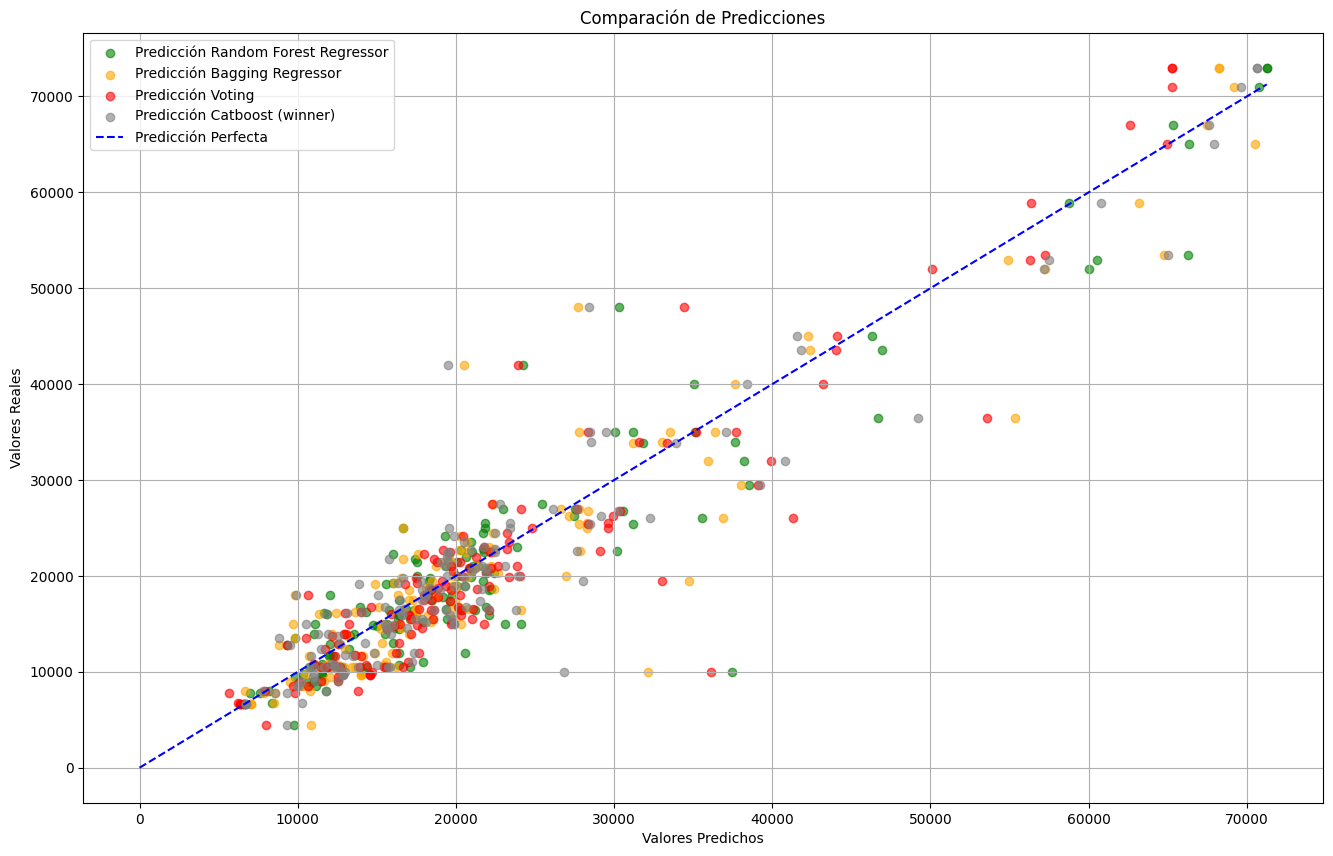

In [47]:
# Crear el scatter plot
plt.figure(figsize=(16, 10))

# Scatter plot para el primer modelo: random Forest con grid Search en verde
plt.scatter(y_pred_original_rf, y_test, color='green', label='Predicción Random Forest Regressor', alpha=0.6)

# Scatter plot para Bagging Regressor en naranja
plt.scatter(bag_pred_original, y_test, color='orange', label='Predicción Bagging Regressor', alpha=0.6)

# Scatter plot para  voting Regressor
plt.scatter(voting_predictions_original, y_test, color='red', label='Predicción Voting', alpha=0.6)

# Scatter plot para catboost en gris
plt.scatter(y_pred_cat_original, y_test, color='grey', label='Predicción Catboost (winner)', alpha=0.6)

# Añadir la línea y=x
# Definir los límites del gráfico
x_min = min(min(y_pred_original_rf), min(bag_pred_original), min(voting_predictions_original), min(y_pred_cat))
x_max = max(max(y_pred_original_rf), max(bag_pred_original), max(voting_predictions_original), max(y_pred_cat))

# Crear un array de valores x para la línea y=x
x = np.linspace(x_min, x_max, 100)
plt.plot(x, x, color='blue', linestyle='--', label='Predicción Perfecta')

# Añadir etiquetas y título
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Comparación de Predicciones')
plt.legend()

# Mostrar la gráfica
plt.grid()
plt.show()

### Elección del Algoritmo

Para la selección del algoritmo de machine learning para este proyecto, se tuvo en cuenta que el target es una variable continua, por lo tanto, se trató de un problema de regresión, donde el objetivo es predecir el precio de un vehículo, para ello, se evaluaron varios algoritmos conocidos por su desempeño en problemas similares.

Se optó por utilizar modelos de ensamble, dado el poder que tienen, ya que permiten ensamblar varios modelos, y sacar lo mejor de cada uno y debido a su robustez frente a la variabilidad de las características de los autos (como año, marca, motor y transmision).

Probando varios metodos de ensamble, nos quedamos con aquel que tenga el menor MAE y el menor MSE al mismo tiempo, el ganador fue 'catboost'.



### Resultados

Los resultados obtenidos con el modelo de machine learning reflejan una mejora significativa en la precisión de la predicción de precios en comparación con métodos más tradicionales de estimación. Al evaluar el modelo con métricas como el Error Medio Absoluto (MAE) y la Raíz del Error Cuadrático Medio (RMSE), se observó que el modelo fue capaz de predecir los precios con una desviación mínima en la mayoría de los casos.

Sin embargo, se identificó que los outliers en los datos de precios aún representan un desafío, influyendo de manera considerable en las predicciones. Para mitigar este efecto, se entrenó al modelo usando el negative_mean_squared_error y tambien se crearon datos sintéticos para los extremos de precios, tanto los mas caros como los mas económicos, se aprecia una leve mejora para aquellos extremos, a costa de una ligera peor performance para valores del rango del percentil 75 hasta arriba.

Aunque el modelo no es perfecto, se reconocen oportunidades para mejoras adicionales, como la experimentación con técnicas de regularización más avanzadas o la inclusión de muchos más datos adicionales que puedan capturar mejor las particularidades del mercado automotriz boliviano.

En conclusión, el modelo desarrollado no solo cumple con el objetivo de ofrecer una valoración alternativa con un margen de error pequeño, para autos usados en Bolivia, sino que también proporciona una base para futuras investigaciones y mejoras en el análisis del mercado automotriz local.

## Anexo:
Antes de llegar a este resultado, probamos con un modelo en el cual se usaba el nombre del modelo del auto para hacer las dummie variables, se llegó a reducir tanto el MAE como el MSE, pero el inconveniente se dio al darnos cuenta que un modelo asi no es capaz de generalizar cuando tiene como input modelos que no conoce.
Para solucionar esto, nos pareció más robusto quedarnos con la marca, si bien el performance bajó nos pareció mejor este útimo modelo